# Truncated Domain, $\chi$

## Setup

In [1]:
import scipy.sparse
import scipy.sparse.linalg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# Global settings for LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'

# local
from DC import DynamicChebyshev
from LSM import MonteCarloOptionPricing

## Run code

In [4]:
# initialize instance from class
DC_option_pricing = DynamicChebyshev(r=0.06, S0=36., K=40., T=1., σ=0.2, dim=10_000, n=252, n_chebyshev_pol=100, seed=150_000)

# offline phase
domain = DC_option_pricing.trunc_domain_GBM()
xknots = DC_option_pricing.nodal_points(domain)
BS = DC_option_pricing.CEV_path(xknots,1.5)
Γ = DC_option_pricing.generalized_moments(domain,xknots)

# online phase
DC_option_pricing.dynamic_chebyshev(xknots,Γ)

array(4.35691477)

## Standard Plot of Paths on Domain

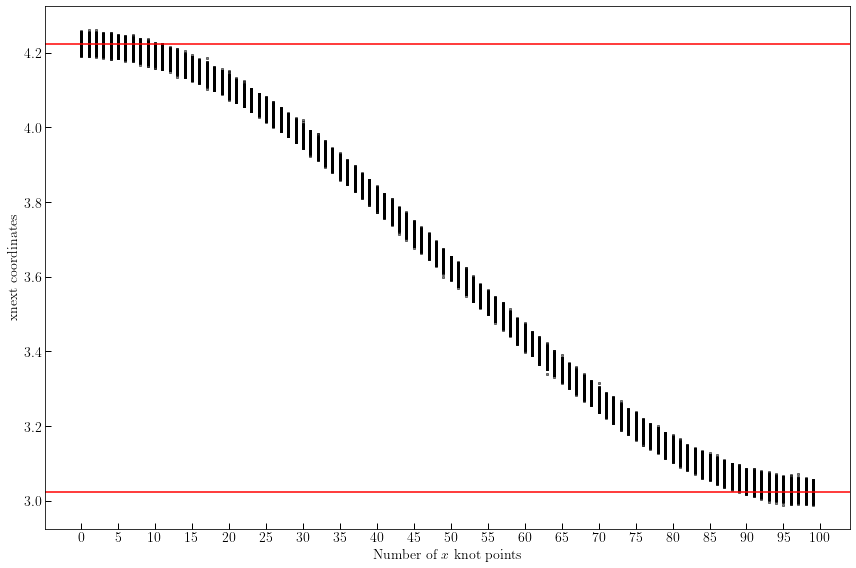

In [5]:
# Set boundaries and initialize figure
lower_boundary, upper_boundary = domain[0], domain[1]
plt.figure(figsize=(12, 8))

# Plot each set of points
for i in range(DC_option_pricing.n_chebyshev_pol):
    # Scatter plot for each time point with smaller dots
    plt.scatter([i] * len(DC_option_pricing.x_next[:, i]), DC_option_pricing.x_next[:, i], alpha=0.5, color='black', s=8, marker='s', label=f'Knot {i+1}')

# Add truncated domain boundaries
plt.axhline(y=lower_boundary, color='r', linestyle='-')
plt.axhline(y=upper_boundary, color='r', linestyle='-')

# Remove grid lines
plt.grid(False)

# Increase ticks on x-axis
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))  # Adjust the 1 to a smaller number if more ticks are needed

# Labels and title with LaTeX formatting
plt.xlabel(f'Number of $x$ knot points', fontsize=14)
plt.ylabel(f'xnext coordinates', fontsize=14)
# Customize tick marks
plt.tick_params(axis='both',          
                direction='in',       
                length=6,             
                width=1,              
                colors='black',       
                grid_alpha=0.5,
               labelsize=14)       


plt.tight_layout()

if not os.path.exists("../Results/plots"):
    os.makedirs("../Results/plots")
    
plt.savefig("../Results/plots/TruncatedDomain.png", bbox_inches='tight')

# Display the plot
plt.show()

## Truncated Domain - Jump Merton Figure to Put in Appendix

In [4]:
# initialize new instance from class
DC_option_pricing_merton = DynamicChebyshev(r=0.06, S0=36., K=40., T=1., σ=0.2, dim=10_000, n=252, n_chebyshev_pol=100, seed=150_000)

# offline phase
domain = DC_option_pricing_merton.trunc_domain_GBM()
xknots = DC_option_pricing_merton.nodal_points(domain)
Jump_Merton = DC_option_pricing_merton.MertonJumpDiffusion_vec(xknots, α=-0.5, β=0.4, λ=0.4)
Γ = DC_option_pricing_merton.generalized_moments(domain,xknots)

# online phase
DC_option_pricing_merton.dynamic_chebyshev(xknots,Γ)

array(4.78697557)

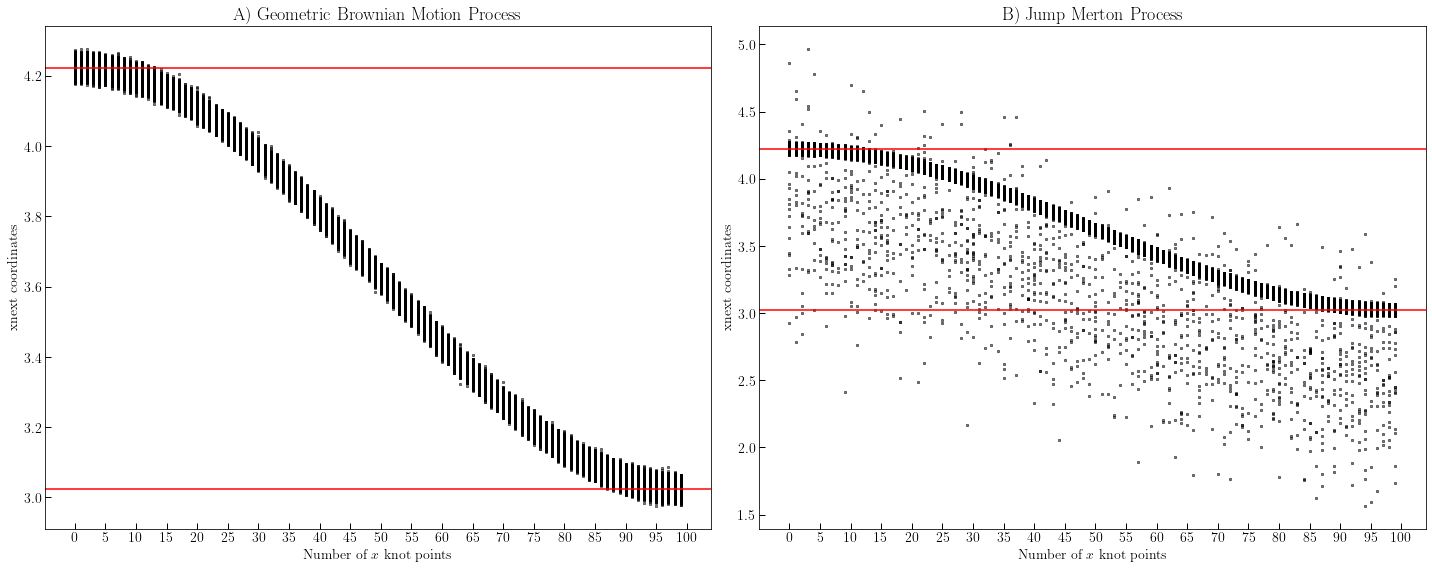

In [5]:
# Set boundaries and initialize figure
lower_boundary, upper_boundary = domain[0], domain[1]

# Initialize figure with two subplots
plt.figure(figsize=(20, 8))

# First subplot for DC_option_pricing
plt.subplot(1, 2, 1)
for i in range(DC_option_pricing.n_chebyshev_pol):
    plt.scatter([i] * len(DC_option_pricing.x_next[:, i]), DC_option_pricing.x_next[:, i], 
                alpha=0.5, color='black', s=8, marker='s', label=f'Knot {i+1}')

# Add truncated domain boundaries
plt.axhline(y=lower_boundary, color='r', linestyle='-')
plt.axhline(y=upper_boundary, color='r', linestyle='-')
plt.grid(False)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xlabel(f'Number of $x$ knot points', fontsize=14)
plt.ylabel(f'xnext coordinates', fontsize=14)
plt.tick_params(axis='both', direction='in', length=6, width=1, colors='black', grid_alpha=0.5, labelsize=14)
plt.title('A) Geometric Brownian Motion Process', size = 18)

# Second subplot for DC_option_pricing_merton
plt.subplot(1, 2, 2)
for i in range(DC_option_pricing_merton.n_chebyshev_pol):
    plt.scatter([i] * len(DC_option_pricing_merton.x_next[:, i]), DC_option_pricing_merton.x_next[:, i], 
                alpha=0.5, color='black', s=8, marker='s', label=f'Knot {i+1}')

# Add truncated domain boundaries
plt.axhline(y=lower_boundary, color='r', linestyle='-')
plt.axhline(y=upper_boundary, color='r', linestyle='-')
plt.grid(False)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xlabel(f'Number of $x$ knot points', fontsize=14)
plt.ylabel(f'xnext coordinates', fontsize=14)
plt.tick_params(axis='both', direction='in', length=6, width=1, colors='black', grid_alpha=0.5, labelsize=14)
plt.title('B) Jump Merton Process', size = 18)

plt.tight_layout()

# Check for directory and save the figure
if not os.path.exists("../Results/plots"):
    os.makedirs("../Results/plots")

plt.savefig("../Results/plots/TruncatedDomainAppendix.png", bbox_inches='tight')

# Display the plot
plt.show()

### Explore How many Paths Fall Within Domain